In [25]:
import torch
import torch.nn as nn
from shap import DeepExplainer

torch.manual_seed(0)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(5, 2),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.last_linear = nn.Linear(2, 2)
        
    def forward(self, x):
        x = self.layers(x)
        x = self.last_linear(x)
        return x

model = MLP()

x = torch.ones((500, 5))
background = torch.zeros((1, 5))

explainer = DeepExplainer(model, background)
explainer_interim = DeepExplainer((model, model.layers[0]), background)

shap_values = explainer.shap_values(x)
shap_values_interim = explainer_interim.shap_values(x)

In [26]:
import shap

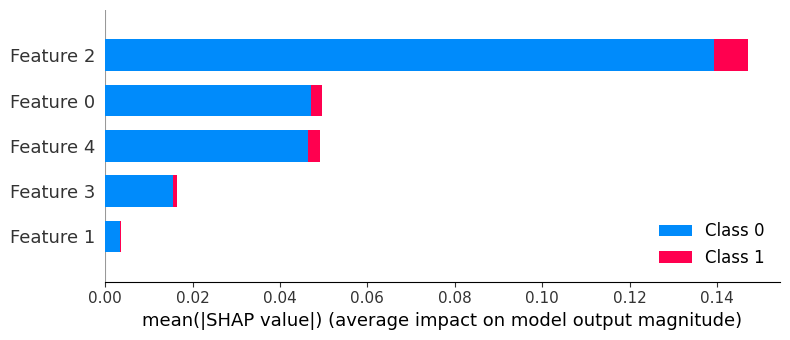

In [27]:
shap.initjs()
# Plots
#shap.force_plot(explainer.expected_value, shap_values, feature_names)
#shap.dependence_plot("b1_price_avg", shap_values, data, feature_names)
shap.summary_plot(shap_values_interim, x, )

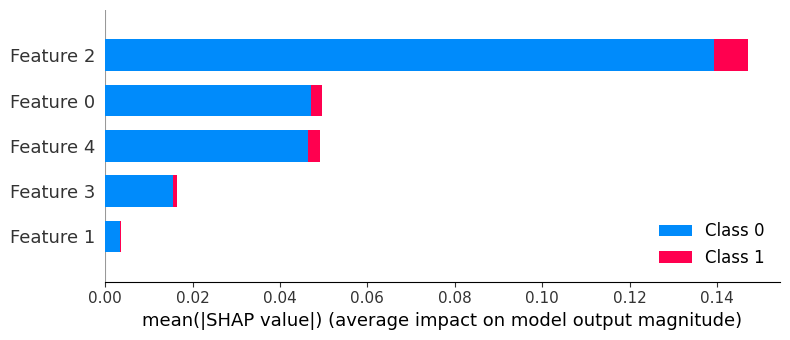

In [28]:
shap.initjs()
# Plots
#shap.force_plot(explainer.expected_value, shap_values, feature_names)
#shap.dependence_plot("b1_price_avg", shap_values, data, feature_names)
shap.summary_plot(shap_values, x, )

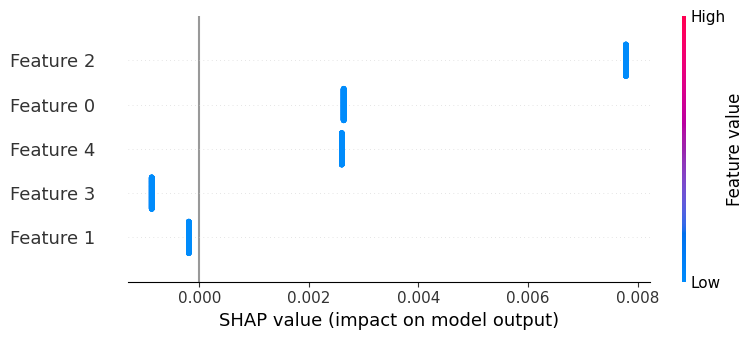

In [29]:
shap.summary_plot(shap_values[1], x)

In [47]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import shap

np.random.seed(101)
shap.initjs()

In [48]:
corpus, y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(
    corpus, y, test_size=0.2, random_state=7
)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(
    corpus_train
).toarray()  # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

In [49]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      2426
        True       0.85      0.85      0.85      2574

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [50]:
explainer = shap.Explainer(
    model, X_train, feature_names=vectorizer.get_feature_names_out()
)
shap_values = explainer(X_test)

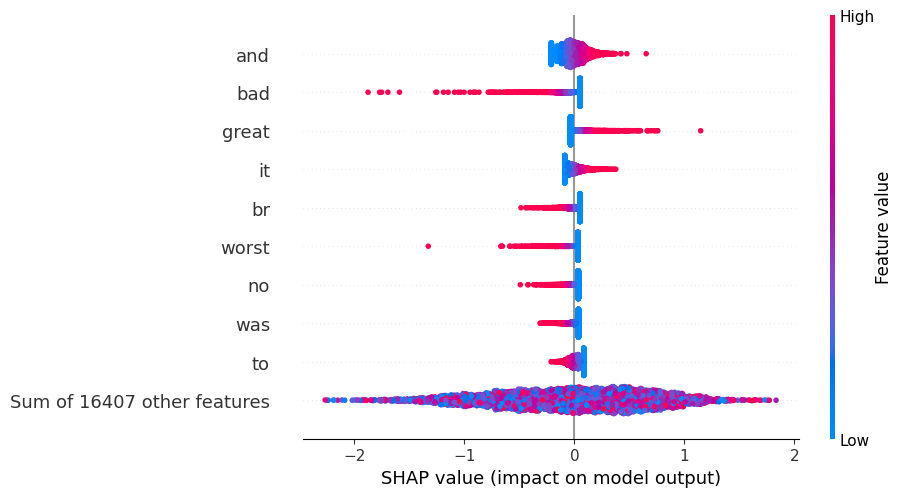

In [51]:
shap.plots.beeswarm(shap_values)

In [53]:
shap_values

.values =
array([[ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00],
       [ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00],
       [ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00],
       ...,
       [ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00],
       [ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00],
       [ 1.60305641e-05,  8.86168252e-05,  0.00000000e+00, ...,
         0.00000000e+00, -3.54997923e-04,  0.00000000e+00]])

.base_values =
array([-0.01716402, -0.01716402, -0.01716402, ..., -0.01716402,
       -0.01716402, -0.01716402])

.data =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0

In [46]:
shap_values

[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00838412,  0.00526909,  0.00020585, -0.00045032,  0.00682268],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.0147444 , -

In [40]:
import torch
import shap
import numpy as np

# 假设已有的模型和数据
model = MLP()
model.eval()  # 设置模型为评估模式

# 准备数据
x = torch.randn(10, 5)  # 示例输入数据

# 使用 SHAP
background = x.mean(dim=0).unsqueeze(0)  # 创建一个背景数据集
e = shap.DeepExplainer(model, background)  # 创建解释器

shap_values = e.shap_values(x)  # 计算 SHAP 值

# 打印结果
print(shap_values)


[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00838412,  0.00526909,  0.00020585, -0.00045032,  0.00682268],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]), array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.0147444 , -0.00926628, -